In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
path='/content/drive/MyDrive/dataset/hmnist_28_28_RGB.csv'


In [7]:
df=pd.read_csv(path)

In [8]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [9]:
#reference https://github.com/rohanmandrekar/Cifar-10-/blob/master/best_attempt%28model7%29.ipynb

fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [10]:
print(len(train_set))

8012


In [11]:
print(len(test_set))

2003


In [12]:
df.label.unique()

array([6, 4, 1, 2, 0, 5, 3])

In [13]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [14]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [15]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [16]:
train_set.head


<bound method NDFrame.head of       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
1700        114         82         59        133        101         81   
7226        131         98        123        138        108        134   
2933        167        111        102        171        115        103   
7612        194        149        175        195        149        173   
750          66         44         45        103         77         75   
...         ...        ...        ...        ...        ...        ...   
2660        206        191        203        207        188        202   
2912        162        123        131        184        151        163   
1400         25         10         15         46         30         42   
322         187        180        182        189        180        184   
2078        209        183        192        214        187        196   

      pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
17

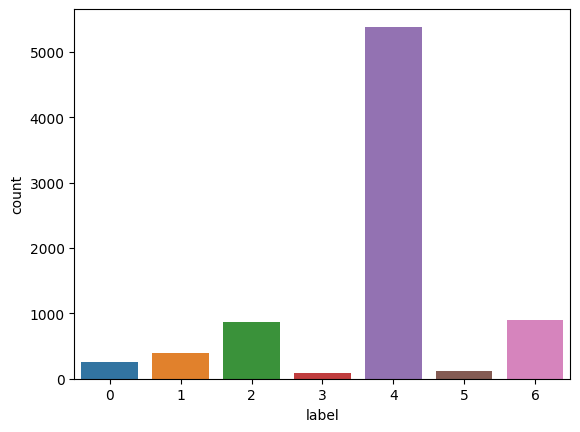

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=train_set)
plt.show()


In [18]:
n_samples, height, width, channels = x_train.shape
x_train_reshaped = x_train.reshape((n_samples, height * width * channels))

oversample = RandomOverSampler()
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train_reshaped, y_train)



ValueError: ignored

In [19]:
sns.countplot(y_train)

KeyError: ignored

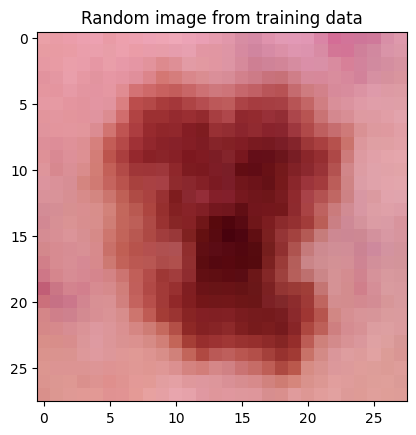

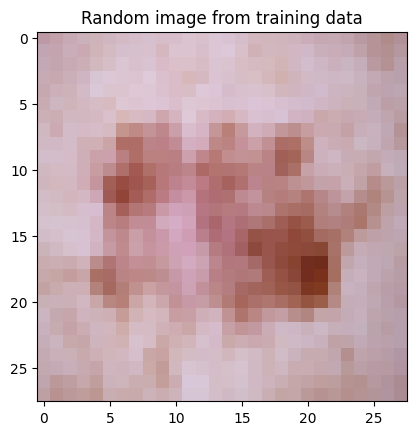

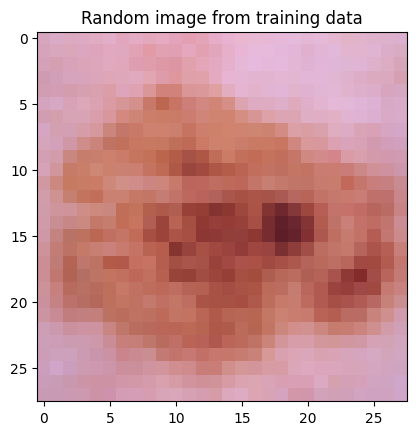

In [20]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [22]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [23]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/dataset/best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1, save_best_only=True)

In [24]:
optimizer=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer =optimizer,
              metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.7704 - accuracy: 0.4668

51/51 [==============================] - 16s 28ms/step - loss: 1.7704 - accuracy: 0.4668 - val_loss: 1.3149 - val_accuracy: 0.6588
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 1.2816 - accuracy: 0.6511

51/51 [==============================] - 1s 11ms/step - loss: 1.2802 - accuracy: 0.6528 - val_loss: 1.1351 - val_accuracy: 0.6450
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 1.0508 - accuracy: 0.6976

51/51 [==============================] - 1s 11ms/step - loss: 1.0539 - accuracy: 0.6976 - val_loss: 1.1890 - val_accuracy: 0.6138
Epoch 4/50
47/51 [==========================>...] - ETA: 0s - loss: 0.9355 - accuracy: 0.7189

51/51 [==============================] - 1s 11ms/step - loss: 0.9312 - accuracy: 0.7198 - val_loss: 1.0114 - val_accuracy: 0.6769
Epoch 5/50
50/51 [============================>.] - ETA: 0s - loss: 0.8486 - accuracy: 0.7292

51/51 [==============================] - 1s 12ms/step - loss: 0.8482 - accuracy: 0.7294 - val_loss: 0.8713 - val_accuracy: 0.7056
Epoch 6/50
48/51 [===========================>..] - ETA: 0s - loss: 0.8175 - accuracy: 0.7334

51/51 [==============================] - 1s 11ms/step - loss: 0.8210 - accuracy: 0.7324 - val_loss: 0.9066 - val_accuracy: 0.6806
Epoch 7/50
49/51 [===========================>..] - ETA: 0s - loss: 0.7512 - accuracy: 0.7487

51/51 [==============================] - 1s 14ms/step - loss: 0.7522 - accuracy: 0.7485 - val_loss: 0.9611 - val_accuracy: 0.6900
Epoch 8/50
51/51 [==============================] - ETA: 0s - loss: 0.8592 - accuracy: 0.7121

51/51 [==============================] - 1s 16ms/step - loss: 0.8592 - accuracy: 0.7121 - val_loss: 1.6947 - val_accuracy: 0.6532
Epoch 9/50
50/51 [============================>.] - ETA: 0s - loss: 0.7516 - accuracy: 0.7378

51/51 [==============================] - 1s 16ms/step - loss: 0.7540 - accuracy: 0.7372 - val_loss: 0.9778 - val_accuracy: 0.6812
Epoch 10/50
50/51 [============================>.] - ETA: 0s - loss: 0.6949 - accuracy: 0.7558

51/51 [==============================] - 1s 15ms/step - loss: 0.6949 - accuracy: 0.7558 - val_loss: 0.8785 - val_accuracy: 0.6925
Epoch 11/50
48/51 [===========================>..] - ETA: 0s - loss: 0.7199 - accuracy: 0.7487

51/51 [==============================] - 1s 16ms/step - loss: 0.7186 - accuracy: 0.7494 - val_loss: 1.2394 - val_accuracy: 0.6769
Epoch 12/50
51/51 [==============================] - ETA: 0s - loss: 0.7527 - accuracy: 0.7415

51/51 [==============================] - 1s 11ms/step - loss: 0.7527 - accuracy: 0.7415 - val_loss: 0.9748 - val_accuracy: 0.6837
Epoch 13/50
51/51 [==============================] - ETA: 0s - loss: 0.7497 - accuracy: 0.7405

51/51 [==============================] - 1s 11ms/step - loss: 0.7497 - accuracy: 0.7405 - val_loss: 1.4291 - val_accuracy: 0.6737
Epoch 14/50
46/51 [==========================>...] - ETA: 0s - loss: 0.7763 - accuracy: 0.7237

51/51 [==============================] - 1s 11ms/step - loss: 0.7738 - accuracy: 0.7238 - val_loss: 1.4709 - val_accuracy: 0.6644
Epoch 15/50
51/51 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.7560

51/51 [==============================] - 1s 12ms/step - loss: 0.6870 - accuracy: 0.7560 - val_loss: 0.9517 - val_accuracy: 0.7087
Epoch 16/50
51/51 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.7603

51/51 [==============================] - 1s 11ms/step - loss: 0.6856 - accuracy: 0.7603 - val_loss: 0.7827 - val_accuracy: 0.7249
Epoch 17/50
50/51 [============================>.] - ETA: 0s - loss: 0.6348 - accuracy: 0.7753

51/51 [==============================] - 1s 11ms/step - loss: 0.6344 - accuracy: 0.7755 - val_loss: 0.7469 - val_accuracy: 0.7268
Epoch 18/50
48/51 [===========================>..] - ETA: 0s - loss: 0.6054 - accuracy: 0.7808

51/51 [==============================] - 1s 11ms/step - loss: 0.6077 - accuracy: 0.7812 - val_loss: 0.7480 - val_accuracy: 0.7180
Epoch 19/50
48/51 [===========================>..] - ETA: 0s - loss: 0.5771 - accuracy: 0.7980

51/51 [==============================] - 1s 11ms/step - loss: 0.5758 - accuracy: 0.7993 - val_loss: 0.7404 - val_accuracy: 0.7099
Epoch 20/50
48/51 [===========================>..] - ETA: 0s - loss: 0.5535 - accuracy: 0.8052

51/51 [==============================] - 1s 11ms/step - loss: 0.5526 - accuracy: 0.8051 - val_loss: 0.7689 - val_accuracy: 0.7280
Epoch 21/50
47/51 [==========================>...] - ETA: 0s - loss: 0.5194 - accuracy: 0.8172

51/51 [==============================] - 1s 11ms/step - loss: 0.5180 - accuracy: 0.8173 - val_loss: 0.8353 - val_accuracy: 0.7187
Epoch 22/50
48/51 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.8208

51/51 [==============================] - 1s 12ms/step - loss: 0.5311 - accuracy: 0.8201 - val_loss: 0.8567 - val_accuracy: 0.7255
Epoch 23/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4677 - accuracy: 0.8401

51/51 [==============================] - 1s 11ms/step - loss: 0.4681 - accuracy: 0.8405 - val_loss: 1.0405 - val_accuracy: 0.7087
Epoch 24/50
46/51 [==========================>...] - ETA: 0s - loss: 0.5810 - accuracy: 0.8015

51/51 [==============================] - 1s 11ms/step - loss: 0.5708 - accuracy: 0.8046 - val_loss: 0.7739 - val_accuracy: 0.7268
Epoch 25/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4745 - accuracy: 0.8389

51/51 [==============================] - 1s 11ms/step - loss: 0.4741 - accuracy: 0.8390 - val_loss: 0.7573 - val_accuracy: 0.7367
Epoch 26/50
47/51 [==========================>...] - ETA: 0s - loss: 0.3969 - accuracy: 0.8664

51/51 [==============================] - 1s 11ms/step - loss: 0.3968 - accuracy: 0.8660 - val_loss: 0.8693 - val_accuracy: 0.7442
Epoch 27/50
46/51 [==========================>...] - ETA: 0s - loss: 0.3724 - accuracy: 0.8752

51/51 [==============================] - 1s 11ms/step - loss: 0.3761 - accuracy: 0.8747 - val_loss: 1.1225 - val_accuracy: 0.6344
Epoch 28/50
48/51 [===========================>..] - ETA: 0s - loss: 0.3282 - accuracy: 0.8887

51/51 [==============================] - 1s 11ms/step - loss: 0.3305 - accuracy: 0.8880 - val_loss: 0.9292 - val_accuracy: 0.7024
Epoch 29/50
48/51 [===========================>..] - ETA: 0s - loss: 0.2662 - accuracy: 0.9110

51/51 [==============================] - 1s 16ms/step - loss: 0.2680 - accuracy: 0.9097 - val_loss: 1.0910 - val_accuracy: 0.7349
Epoch 30/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4327 - accuracy: 0.8544

51/51 [==============================] - 1s 16ms/step - loss: 0.4349 - accuracy: 0.8541 - val_loss: 0.9841 - val_accuracy: 0.6812
Epoch 31/50
50/51 [============================>.] - ETA: 0s - loss: 0.3221 - accuracy: 0.8941

51/51 [==============================] - 1s 15ms/step - loss: 0.3224 - accuracy: 0.8941 - val_loss: 0.9335 - val_accuracy: 0.7249
Epoch 32/50
50/51 [============================>.] - ETA: 0s - loss: 0.2502 - accuracy: 0.9177

51/51 [==============================] - 1s 16ms/step - loss: 0.2514 - accuracy: 0.9175 - val_loss: 1.1119 - val_accuracy: 0.7068
Epoch 33/50
46/51 [==========================>...] - ETA: 0s - loss: 0.3252 - accuracy: 0.8899

51/51 [==============================] - 1s 15ms/step - loss: 0.3205 - accuracy: 0.8911 - val_loss: 1.0138 - val_accuracy: 0.6987
Epoch 34/50
49/51 [===========================>..] - ETA: 0s - loss: 0.2077 - accuracy: 0.9365

51/51 [==============================] - 1s 12ms/step - loss: 0.2091 - accuracy: 0.9357 - val_loss: 1.1411 - val_accuracy: 0.6987
Epoch 35/50
49/51 [===========================>..] - ETA: 0s - loss: 0.1940 - accuracy: 0.9381

51/51 [==============================] - 1s 11ms/step - loss: 0.1956 - accuracy: 0.9373 - val_loss: 1.6557 - val_accuracy: 0.6313
Epoch 36/50
51/51 [==============================] - ETA: 0s - loss: 0.1644 - accuracy: 0.9518

51/51 [==============================] - 1s 11ms/step - loss: 0.1644 - accuracy: 0.9518 - val_loss: 1.2307 - val_accuracy: 0.7187
Epoch 37/50
51/51 [==============================] - ETA: 0s - loss: 0.1313 - accuracy: 0.9585

51/51 [==============================] - 1s 11ms/step - loss: 0.1313 - accuracy: 0.9585 - val_loss: 1.2826 - val_accuracy: 0.7118
Epoch 38/50
51/51 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.9039

51/51 [==============================] - 1s 11ms/step - loss: 0.2876 - accuracy: 0.9039 - val_loss: 1.2702 - val_accuracy: 0.6956
Epoch 39/50
46/51 [==========================>...] - ETA: 0s - loss: 0.3627 - accuracy: 0.8782

51/51 [==============================] - 1s 11ms/step - loss: 0.3549 - accuracy: 0.8799 - val_loss: 1.3584 - val_accuracy: 0.7062
Epoch 40/50
46/51 [==========================>...] - ETA: 0s - loss: 0.1764 - accuracy: 0.9429

51/51 [==============================] - 1s 11ms/step - loss: 0.1790 - accuracy: 0.9420 - val_loss: 1.5378 - val_accuracy: 0.6394
Epoch 41/50
48/51 [===========================>..] - ETA: 0s - loss: 0.2501 - accuracy: 0.9196

51/51 [==============================] - 1s 11ms/step - loss: 0.2477 - accuracy: 0.9198 - val_loss: 1.1376 - val_accuracy: 0.7224
Epoch 42/50
48/51 [===========================>..] - ETA: 0s - loss: 0.1752 - accuracy: 0.9434

51/51 [==============================] - 1s 12ms/step - loss: 0.1755 - accuracy: 0.9430 - val_loss: 1.2498 - val_accuracy: 0.7180
Epoch 43/50
47/51 [==========================>...] - ETA: 0s - loss: 0.1751 - accuracy: 0.9446

51/51 [==============================] - 1s 11ms/step - loss: 0.1731 - accuracy: 0.9454 - val_loss: 1.1816 - val_accuracy: 0.7199
Epoch 44/50
49/51 [===========================>..] - ETA: 0s - loss: 0.1684 - accuracy: 0.9458

51/51 [==============================] - 1s 12ms/step - loss: 0.1686 - accuracy: 0.9460 - val_loss: 1.3408 - val_accuracy: 0.6843
Epoch 45/50
50/51 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9278

51/51 [==============================] - 1s 12ms/step - loss: 0.2204 - accuracy: 0.9276 - val_loss: 1.3056 - val_accuracy: 0.6981
Epoch 46/50
46/51 [==========================>...] - ETA: 0s - loss: 0.1211 - accuracy: 0.9626

51/51 [==============================] - 1s 11ms/step - loss: 0.1189 - accuracy: 0.9635 - val_loss: 1.5195 - val_accuracy: 0.6625
Epoch 47/50
46/51 [==========================>...] - ETA: 0s - loss: 0.1179 - accuracy: 0.9613

51/51 [==============================] - 1s 12ms/step - loss: 0.1171 - accuracy: 0.9616 - val_loss: 1.4037 - val_accuracy: 0.7049
Epoch 48/50
48/51 [===========================>..] - ETA: 0s - loss: 0.1469 - accuracy: 0.9548

51/51 [==============================] - 1s 11ms/step - loss: 0.1462 - accuracy: 0.9552 - val_loss: 1.2213 - val_accuracy: 0.7243
Epoch 49/50
48/51 [===========================>..] - ETA: 0s - loss: 0.1076 - accuracy: 0.9639

51/51 [==============================] - 1s 11ms/step - loss: 0.1068 - accuracy: 0.9643 - val_loss: 1.2136 - val_accuracy: 0.7399
Epoch 50/50
51/51 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9816

51/51 [==============================] - 1s 13ms/step - loss: 0.0643 - accuracy: 0.9816 - val_loss: 1.3613 - val_accuracy: 0.7311


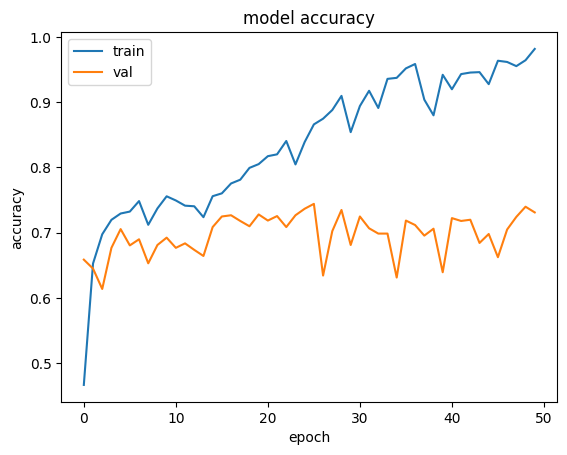

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


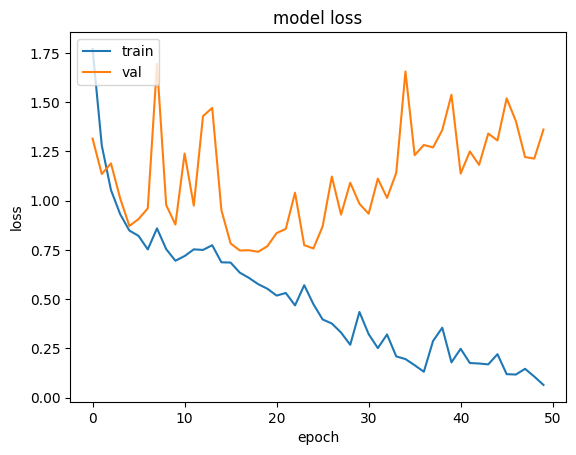

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
model.load_weights('/content/drive/MyDrive/dataset/best_model.h5')

In [28]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 0.1937 - accuracy: 0.9521 - 743ms/epoch - 12ms/step


In [30]:
import PIL
image=PIL.Image.open('/content/drive/MyDrive/dataset/tester.jpg')
image=image.resize((28,28))
img=x_test[1]
img=np.array(image).reshape(-1,28,28,3)
result=model.predict(img)
print(result[0])
result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])

1/1 [==============================] - 0s 21ms/step
[2.0399608e-05 2.6462611e-04 5.1834214e-02 5.3969849e-05 9.4754112e-01
 6.8469759e-05 2.1716212e-04]
('nv', ' melanocytic nevi')
